In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Getting the dataset

In [2]:
bcd=pd.read_csv('data.csv')

In [4]:
bcd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
bcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Applying data cleaning

In [6]:
bcd.drop(labels=['Unnamed: 32','id'],axis=1,inplace=True)
bcd['diagnosis'] = bcd['diagnosis'].apply(lambda x : {'M':0,'B':1}[x] )

In [8]:
bcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [9]:
bcd.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Performing visualization

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


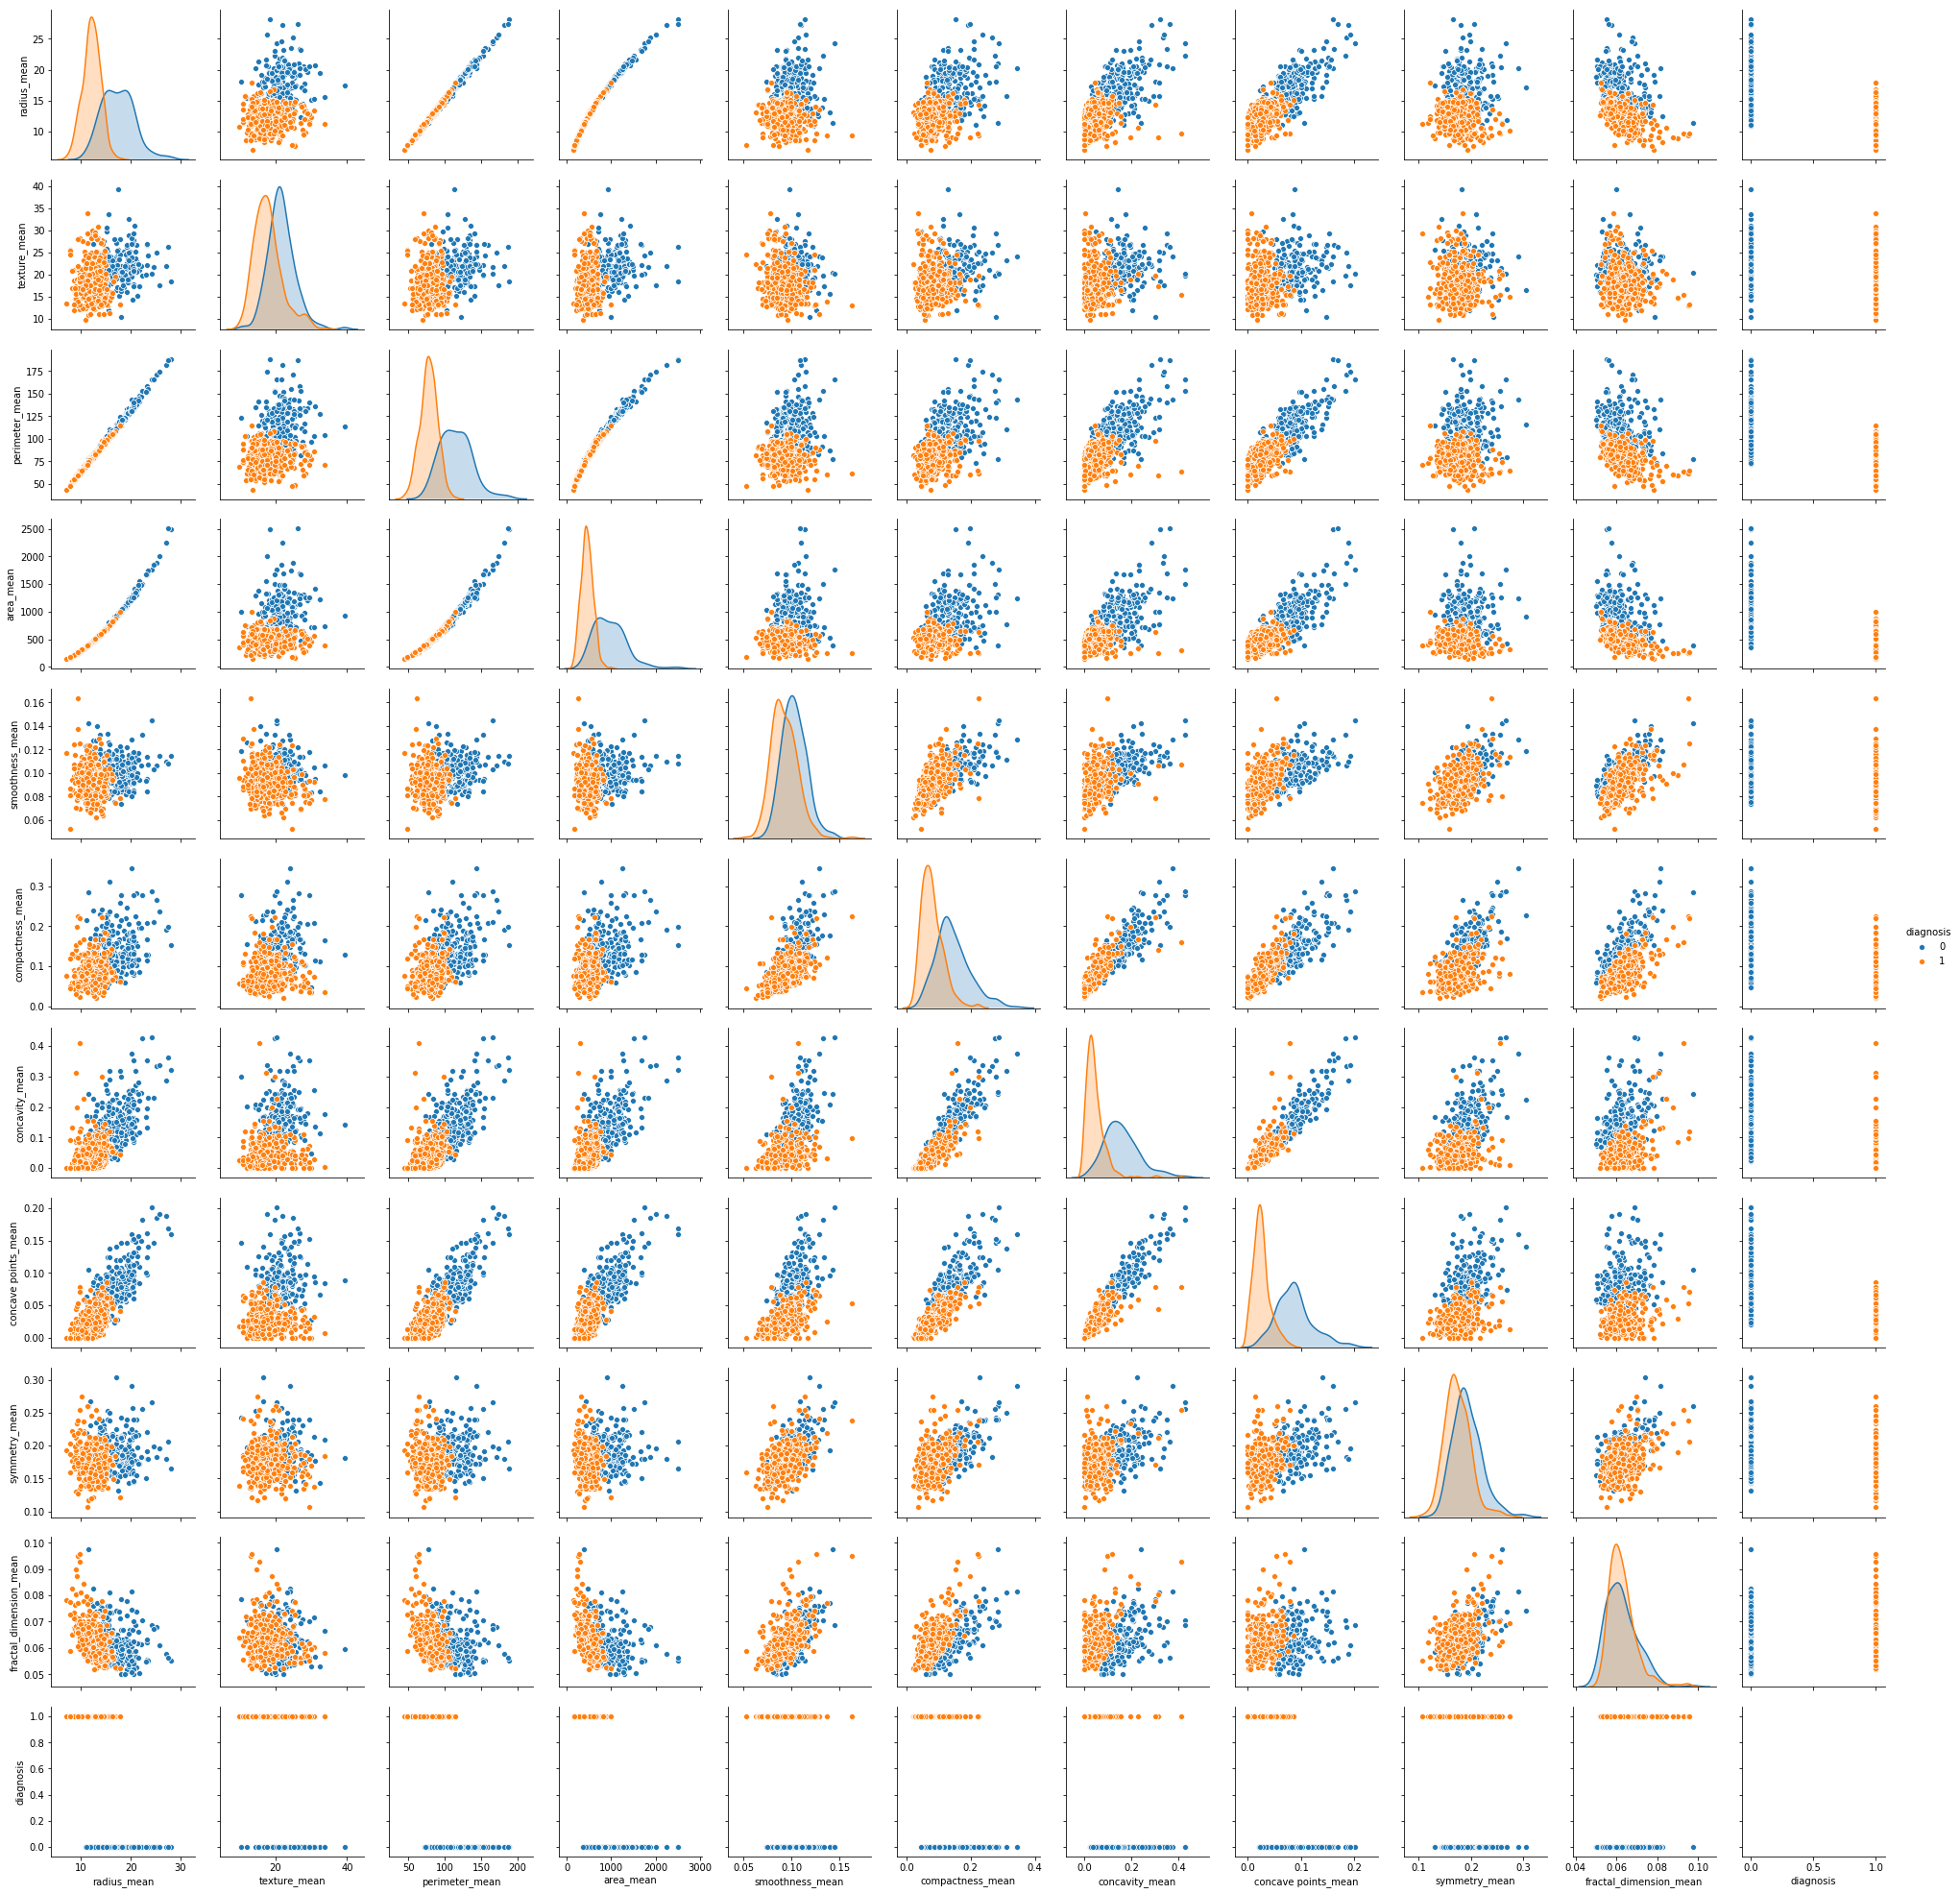

In [10]:
sns.pairplot(data=bcd[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']],hue='diagnosis')

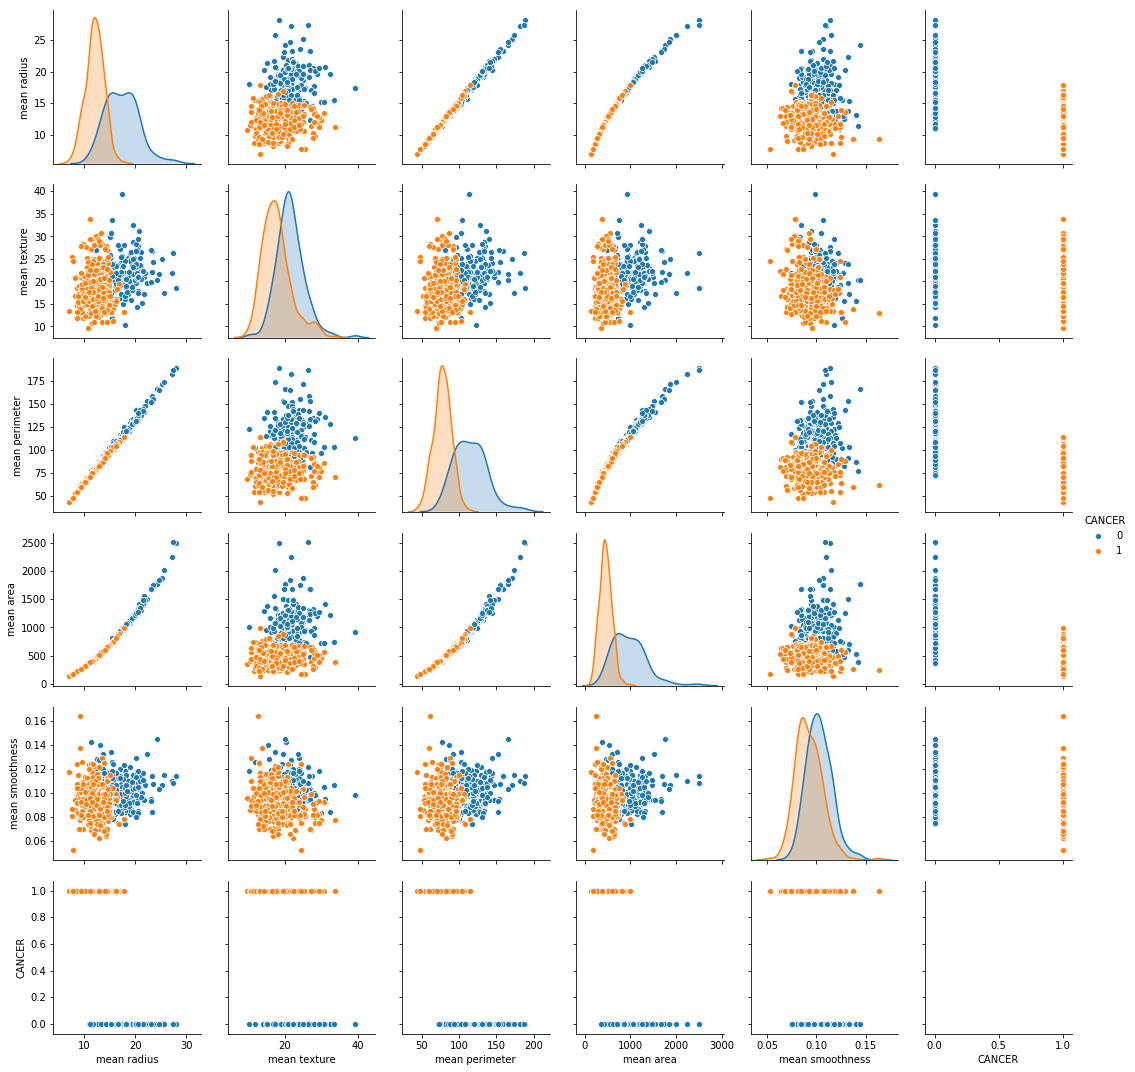

In [110]:
sns.pairplot(data=vdf[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness','CANCER']],hue='CANCER')

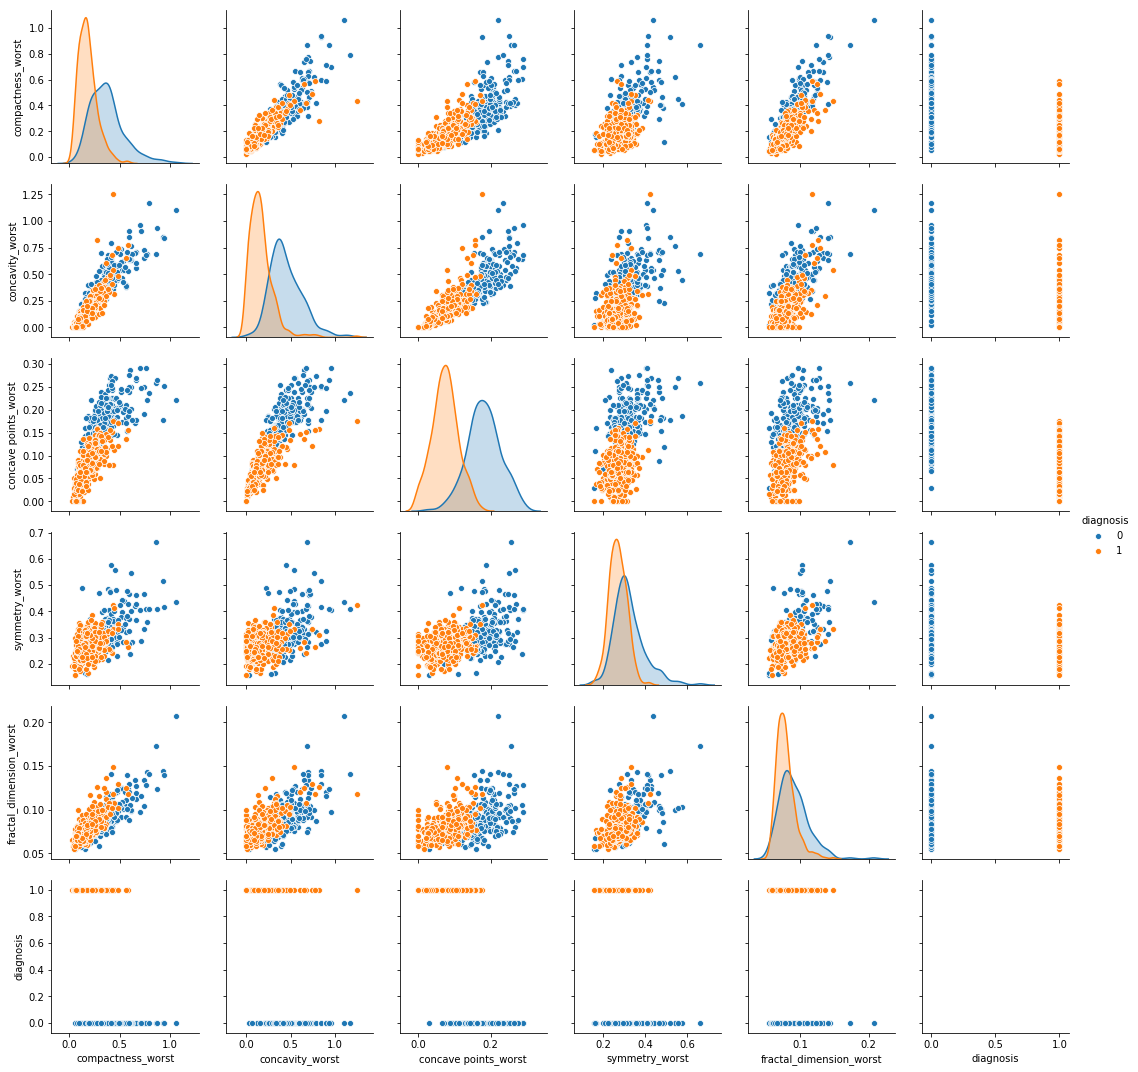

In [13]:
sns.pairplot(data=bcd[['compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst','diagnosis']],hue='diagnosis')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bcd.drop(labels=['diagnosis'],axis=1),bcd['diagnosis'], test_size=0.30, random_state=101)
#performing scaling on the data to improive the training and providing equal weight to each features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Applying SVM classifier 

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

### First performing grid search to get the perfect values of the C and gamma parameters

In [31]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train_scaled,y_train)

In [57]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [65]:
grid_predictions = grid.predict(X_test_scaled)
print("Classification Matrix\n",classification_report(y_test,grid_predictions))
print("Confussion Matrix \n",confusion_matrix(y_test,grid_predictions))
print('Accuracy of SVM Classifier on test set:{:.3f}'.format(grid.score(X_test_scaled,y_test)))
print("Accuracy of SVM classifier on training set:{:.3f}".format(grid.score(X_train_scaled,y_train)))

Classification Matrix
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        66
           1       0.96      0.99      0.98       105

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Confussion MAtrix 
 [[ 62   4]
 [  1 104]]
Accuracy of SVM Classifier on test set:0.971
Accuracy of SVM classifier on training set:0.982


### Applying Gaussian Naive Bayes 

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nbclf = GaussianNB().fit(X_train_scaled, y_train)
print('Accuracy of GaussianNB classifier on training set: {:.3f}'
     .format(nbclf.score(X_train_scaled, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.3f}'
     .format(nbclf.score(X_test_scaled, y_test)))
nb_predictions = nbclf.predict(X_test_scaled)
print("Classification Matrix\n",classification_report(y_test,nb_predictions))
print("Confussion Matrix \n",confusion_matrix(y_test,nb_predictions))

Accuracy of GaussianNB classifier on training set: 0.955
Accuracy of GaussianNB classifier on test set: 0.918
Classification Matrix
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        66
           1       0.93      0.94      0.93       105

   micro avg       0.92      0.92      0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

Confussion Matrix 
 [[58  8]
 [ 6 99]]


### Applying Gradient Boosting Decision Tree

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(random_state = 0)
gbclf.fit(X_train_scaled, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(gbclf.score(X_train_scaled, y_train)))
print('Accuracy of GBDT classifier on test set: {:.3f}\n'
     .format(gbclf.score(X_test_scaled, y_test)))

gb_predictions = gbclf.predict(X_test_scaled)
print("Classification Matrix\n",classification_report(y_test,gb_predictions))
print("Confussion Matrix \n",confusion_matrix(y_test,gb_predictions))



Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.000
Accuracy of GBDT classifier on test set: 0.959

Classification Matrix
               precision    recall  f1-score   support

           0       0.95      0.94      0.95        66
           1       0.96      0.97      0.97       105

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Confussion Matrix 
 [[ 62   4]
 [  3 102]]


### Applying NN 

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

nnclf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.3f}'
     .format(nnclf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.3f}'
     .format(nnclf.score(X_test_scaled, y_test)))
nn_predictions = nnclf.predict(X_test_scaled)
print("Classification Matrix\n",classification_report(y_test,nn_predictions))
print("Confussion Matrix \n",confusion_matrix(y_test,nn_predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Breast cancer dataset
Accuracy of NN classifier on training set: 0.982
Accuracy of NN classifier on test set: 0.971
Classification Matrix
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        66
           1       0.95      1.00      0.98       105

   micro avg       0.97      0.97      0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Confussion Matrix 
 [[ 61   5]
 [  0 105]]


### Applying Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier( n_estimators=10,max_features = 8, random_state = 0)
rfclf.fit(X_train_scaled, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(rfclf.score(X_train_scaled, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rfclf.score(X_test_scaled, y_test)))
rf_predictions = rfclf.predict(X_test_scaled)
print("Classification Matrix\n",classification_report(y_test,rf_predictions))
print("Confussion Matrix \n",confusion_matrix(y_test,rf_predictions))

Accuracy of RF classifier on training set: 0.99
Accuracy of RF classifier on test set: 0.94
Classification Matrix
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        66
           1       0.95      0.95      0.95       105

   micro avg       0.94      0.94      0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Confussion Matrix 
 [[ 61   5]
 [  5 100]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## Best test set preformance is given by SVM

In [77]:
fclf=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
fclf.fit(X_train_scaled,y_train)
print('Accuracy of SVM Classifier on test set:{:.3f}'.format(fclf.score(X_test_scaled,y_test)))
print("Accuracy of SVM classifier on training set:{:.3f}".format(fclf.score(X_train_scaled,y_train)))
final_predictions = fclf.predict(X_test_scaled)
print("Classification Matrix\n",classification_report(y_test,final_predictions))
print("Confussion Matrix \n",confusion_matrix(y_test,final_predictions))

Accuracy of SVM Classifier on test set:0.971
Accuracy of SVM classifier on training set:0.982
Classification Matrix
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        66
           1       0.96      0.99      0.98       105

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Confussion Matrix 
 [[ 62   4]
 [  1 104]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
def getclassifier():
    from sklearn.svm import SVC
    from sklearn.metrics import classification_report,confusion_matrix
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    bcd=pd.read_csv('data.csv')
    bcd.drop(labels=['Unnamed: 32','id'],axis=1,inplace=True)
    bcd['diagnosis'] = bcd['diagnosis'].apply(lambda x : {'M':0,'B':1}[x] )
    X_train, X_test, y_train, y_test = train_test_split(bcd.drop(labels=['diagnosis'],axis=1),bcd['diagnosis'], test_size=0.30, random_state=101)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    fclf=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
             decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
             max_iter=-1, probability=False, random_state=None, shrinking=True,
             tol=0.001, verbose=False)
    fclf.fit(X_train_scaled,y_train)

    print('Accuracy of SVM Classifier on test set:{:.3f}'.format(fclf.score(X_test_scaled,y_test)))
    print("Accuracy of SVM classifier on training set:{:.3f}".format(fclf.score(X_train_scaled,y_train)))
    final_predictions = fclf.predict(X_test_scaled)
    print("Classification Matrix\n",classification_report(y_test,final_predictions))
    print("Confussion Matrix \n",confusion_matrix(y_test,final_predictions))
    return fclf